# Amazon Reviews dataset, collected in 2023

- Official link: https://amazon-reviews-2023.github.io/main.html
- Category: Electronics
- Users: 18.3M
- Items: 1.6M
- Ratings: 43.9M
- R_Token: 2.7B
- M_Token: 1.7B
- review: https://mcauleylab.ucsd.edu/public_datasets/data/amazon_2023/raw/review_categories/Electronics.jsonl.gz
- meta: https://mcauleylab.ucsd.edu/public_datasets/data/amazon_2023/raw/meta_categories/meta_Electronics.jsonl.gz 

### Dependencies

In [1]:
import json
import pandas as pd

## Sampling
---

### 1. Filter Items that have been observed for the first time in year 2022 or later.

In [2]:
def filter_data(data: dict) -> dict:
    '''Return boolean values, where True means the data is not valid'''
    filter = False
    if int(data['details']['Date First Available'][-4:]) < 2022:
        filter = True

    return filter

In [4]:
with open("../data/raw/meta_Electronics.jsonl", 'r') as fp:
    with open("../data/meta_Electronics_2022_2023.jsonl", 'a', encoding='utf-8') as fp_out:
        with open("../data/drop/meta_Electronics_2022_2023_no_date.jsonl", 'a', encoding='utf-8') as fp_out_no_date:
            i = 0
            for line in fp:
                data = json.loads(line.strip())
                try:
                    filter = filter_data(data)
                    if not filter:
                        json.dump(data, fp_out)
                        fp_out.write('\n')
                        fp_out.flush()
                except:
                    json.dump(data, fp_out_no_date)
                    fp_out_no_date.write('\n')
                    fp_out_no_date.flush()
                i += 1
                if i % 10000 == 0:
                    print(f"Processed {i/1000} k lines")

Processed 10.0 k lines
Processed 20.0 k lines
Processed 30.0 k lines
Processed 40.0 k lines
Processed 50.0 k lines
Processed 60.0 k lines
Processed 70.0 k lines
Processed 80.0 k lines
Processed 90.0 k lines
Processed 100.0 k lines
Processed 110.0 k lines
Processed 120.0 k lines
Processed 130.0 k lines
Processed 140.0 k lines
Processed 150.0 k lines
Processed 160.0 k lines
Processed 170.0 k lines
Processed 180.0 k lines
Processed 190.0 k lines
Processed 200.0 k lines
Processed 210.0 k lines
Processed 220.0 k lines
Processed 230.0 k lines
Processed 240.0 k lines
Processed 250.0 k lines
Processed 260.0 k lines
Processed 270.0 k lines
Processed 280.0 k lines
Processed 290.0 k lines
Processed 300.0 k lines
Processed 310.0 k lines
Processed 320.0 k lines
Processed 330.0 k lines
Processed 340.0 k lines
Processed 350.0 k lines
Processed 360.0 k lines
Processed 370.0 k lines
Processed 380.0 k lines
Processed 390.0 k lines
Processed 400.0 k lines
Processed 410.0 k lines
Processed 420.0 k lines
P

### 2. Filter Items, where "main category" is not empty

In [5]:
def filter_category(data: dict) -> dict:
    '''Return boolean values, where True means the data is not valid'''
    filter = False
    if data['main_category'] == None:
        filter = True

    return filter

In [6]:
with open("../data/meta_Electronics_2022_2023.jsonl", 'r') as fp:
    with open("../data/meta_Electronics_2022_2023_with_category.jsonl", 'a', encoding='utf-8') as fp_out:
        with open("../data/drop/meta_Electronics_2022_2023_no_category.jsonl", 'a', encoding='utf-8') as fp_out_no_category:
            for line in fp:
                data = json.loads(line.strip())
                if not filter_category(data):
                    json.dump(data, fp_out)
                    fp_out.write('\n')
                    fp_out.flush()
                else:
                    json.dump(data, fp_out_no_category)
                    fp_out_no_category.write('\n')
                    fp_out_no_category.flush()

Explore dsitribution by categories

In [7]:
df = pd.read_json("../data/meta_Electronics_2022_2023_with_category.jsonl", lines=True)
print(df.shape)

(103993, 16)


In [8]:
len(df['main_category'].unique()), df['main_category'].unique()

(31,
 array(['Amazon Home', 'Computers', 'Cell Phones & Accessories',
        'All Electronics', 'Camera & Photo', 'Industrial & Scientific',
        'Tools & Home Improvement', 'Home Audio & Theater',
        'Sports & Outdoors', 'Musical Instruments', 'GPS & Navigation',
        'Office Products', 'AMAZON FASHION', 'Car Electronics',
        'Video Games', 'Automotive', 'Amazon Devices',
        'Health & Personal Care', 'Pet Supplies', 'Amazon Fire TV',
        'Portable Audio & Accessories', 'Arts, Crafts & Sewing',
        'Toys & Games', 'All Beauty', 'Handmade', 'Appliances',
        'Collectible Coins', 'Software', 'Books', 'Baby', 'Fire Phone'],
       dtype=object))

<Axes: xlabel='main_category'>

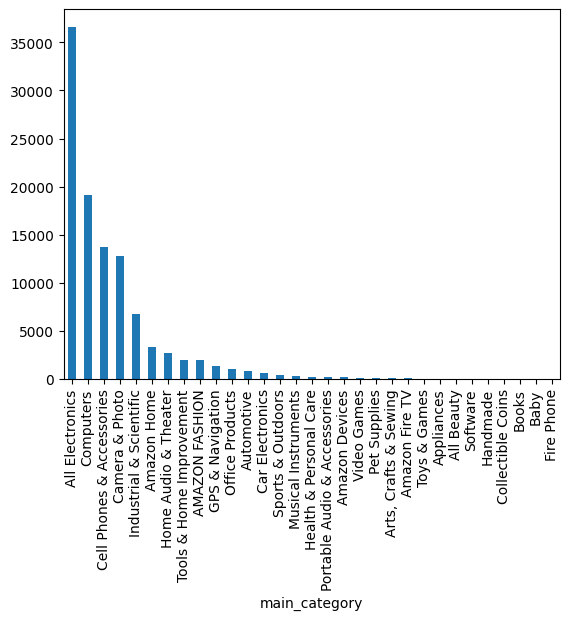

In [10]:
df['main_category'].value_counts().plot(kind='bar')

### Filter out items that have at least 100 ratings

In [11]:
df_ratings_100 = df[df['rating_number'] > 100]

Explore distribution of ratings

<Axes: ylabel='Frequency'>

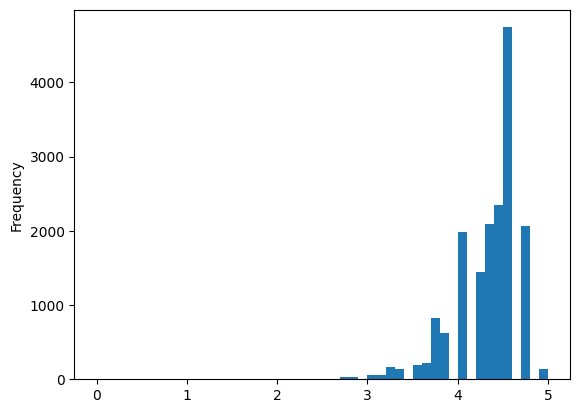

In [12]:
df_ratings_100['average_rating'].plot(kind='hist', bins=50, range=(0, 5))

### Sample 1000 items

In [13]:
df_sample_1000 = df_ratings_100.sample(n=1000, random_state=20)

<Axes: ylabel='Frequency'>

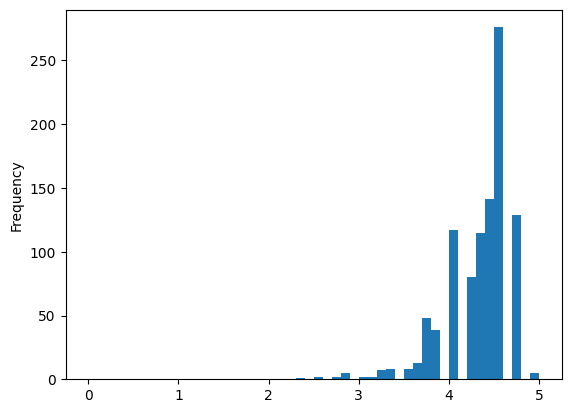

In [14]:
df_sample_1000['average_rating'].plot(kind='hist', bins=50, range=(0, 5))

<Axes: ylabel='Frequency'>

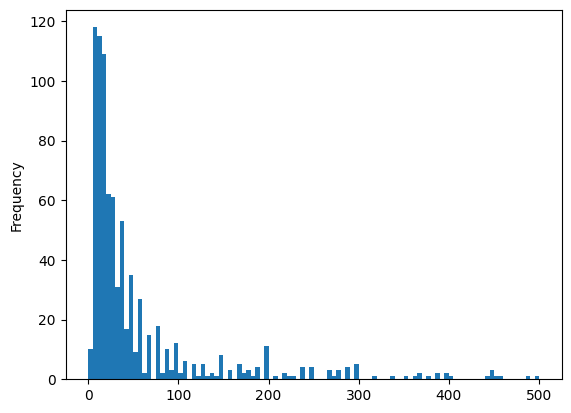

In [15]:
df_sample_1000['price'].plot(kind='hist', bins=100, range=(0, 500))

In [16]:
df_ratings_100.to_json("../data/meta_Electronics_2022_2023_with_category_ratings_100.jsonl", orient='records', lines=True)

In [17]:
df_sample_1000.to_json("../data/meta_Electronics_2022_2023_with_category_ratings_100_sample_1000.jsonl", orient='records', lines=True)

## Extract ratings that match sampled data.

In [18]:
df_ratings_100 = pd.read_json("../data/meta_Electronics_2022_2023_with_category_ratings_100.jsonl", lines=True)
df_sample_1000 = pd.read_json("../data/meta_Electronics_2022_2023_with_category_ratings_100_sample_1000.jsonl", lines=True)

In [19]:
# Gabriels suggestion
id_set = set(df_ratings_100['parent_asin'].values)

with open("../data/raw/Electronics.jsonl", "r") as fp, \
     open("../data/Electronics_2022_2023_with_category_ratings_100.jsonl", "a", encoding="utf-8") as fp_out:

    for i, line in enumerate(fp, 1):
        data = json.loads(line.strip())
        if data.get('parent_asin') in id_set:
            json.dump(data, fp_out)
            fp_out.write("\n")

        if i % 100000 == 0:
            print(f"Processed {i/1000} k lines")

Processed 100.0 k lines
Processed 200.0 k lines
Processed 300.0 k lines
Processed 400.0 k lines
Processed 500.0 k lines
Processed 600.0 k lines
Processed 700.0 k lines
Processed 800.0 k lines
Processed 900.0 k lines
Processed 1000.0 k lines
Processed 1100.0 k lines
Processed 1200.0 k lines
Processed 1300.0 k lines
Processed 1400.0 k lines
Processed 1500.0 k lines
Processed 1600.0 k lines
Processed 1700.0 k lines
Processed 1800.0 k lines
Processed 1900.0 k lines
Processed 2000.0 k lines
Processed 2100.0 k lines
Processed 2200.0 k lines
Processed 2300.0 k lines
Processed 2400.0 k lines
Processed 2500.0 k lines
Processed 2600.0 k lines
Processed 2700.0 k lines
Processed 2800.0 k lines
Processed 2900.0 k lines
Processed 3000.0 k lines
Processed 3100.0 k lines
Processed 3200.0 k lines
Processed 3300.0 k lines
Processed 3400.0 k lines
Processed 3500.0 k lines
Processed 3600.0 k lines
Processed 3700.0 k lines
Processed 3800.0 k lines
Processed 3900.0 k lines
Processed 4000.0 k lines
Processed

In [ ]:
# with open("../data/Electronics.jsonl", 'r') as fp:
#     with open("../data/Electornics_2022_2023_with_category_ratings_100.jsonl", 'a') as fp_out:
#         id_list = df_ratings_100['parent_asin'].values
#         i = 0
#         for line in fp:
#             data = json.loads(line.strip())
#             if data['parent_asin'] in id_list:
#                 json.dump(data, fp_out)
#                 fp_out.write('\n')
#                 fp_out.flush()
#             i += 1
#             if i % 100000 == 0:
#                 print(f"Processed {i} lines")

In [20]:
with open("../data/Electronics_2022_2023_with_category_ratings_100.jsonl", 'r') as fp:
    with open("../data/Electronics_2022_2023_with_category_ratings_100_sample_1000.jsonl", 'a') as fp_out:
        id_list = df_sample_1000['parent_asin'].values
        i = 0
        for line in fp:
            data = json.loads(line.strip())
            if data['parent_asin'] in id_list:
                json.dump(data, fp_out)
                fp_out.write('\n')
                fp_out.flush()
            i += 1
            if i % 100000 == 0:
                print(f"Processed {i/1000} k lines")

Processed 100.0 k lines
Processed 200.0 k lines
Processed 300.0 k lines
Processed 400.0 k lines
Processed 500.0 k lines
Processed 600.0 k lines
Processed 700.0 k lines
Processed 800.0 k lines
Processed 900.0 k lines
Processed 1000.0 k lines
Processed 1100.0 k lines
Processed 1200.0 k lines
Processed 1300.0 k lines
Processed 1400.0 k lines
Processed 1500.0 k lines
Processed 1600.0 k lines
Processed 1700.0 k lines


---

## Sneak peak

In [21]:
import pandas as pd
import json

def read_jsonl_to_dataframe(file_path, max_rows=None):
    data = []
    with open(file_path, 'r', encoding='utf-8') as file:
        for i, line in enumerate(file):
            if max_rows and i >= max_rows:
                break
            data.append(json.loads(line.strip()))
    return pd.DataFrame(data)

In [22]:
file_path_ratings = "../data/Electronics_2022_2023_with_category_ratings_100_sample_1000.jsonl"
file_path_meta = "../data/meta_Electronics_2022_2023_with_category_ratings_100_sample_1000.jsonl"

df_ratings = read_jsonl_to_dataframe(file_path_ratings)
df_meta = read_jsonl_to_dataframe(file_path_meta)


### Meta data

In [23]:
print(df_meta.shape)
print(df_meta.columns)
display(df_meta.head())

(1000, 16)
Index(['main_category', 'title', 'average_rating', 'rating_number', 'features',
       'description', 'price', 'images', 'videos', 'store', 'categories',
       'details', 'parent_asin', 'bought_together', 'subtitle', 'author'],
      dtype='object')


,main_category,title,average_rating,rating_number,features,description,price,images,videos,store,categories,details,parent_asin,bought_together,subtitle,author
0,Industrial & Scientific,"RAVODOI USB C Cable, [2Pack/3.3ft+6.6ft] USB T...",4.4,119,[【Fast Charging Cord】These USB C cables provid...,[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,"[{'title': 'Type-C Charger Cable ', 'url': 'ht...",RAVODOI,"[Electronics, Computers & Accessories, Compute...","{'Brand': 'RAVODOI', 'Connector Type': 'USB Ty...",B09R4Y2HKY,None,None,None
1,All Electronics,"SNESH-2 Pack USB-C Female to USB Male Adapter,...",4.5,352,[🔹(Light & compact) Easy to carry and light we...,[],4.99,[{'thumb': 'https://m.media-amazon.com/images/...,"[{'title': 'USB Male & Female Adapter', 'url':...",SNESH,"[Electronics, Computers & Accessories, Compute...",{'Package Dimensions': '3.54 x 2.4 x 0.35 inch...,B09JV5FM2S,None,None,None
2,All Electronics,USB C Docking Station Dual Monitor for MacBook...,3.9,1193,[【18-in-1Docking Station】With USB C Docking St...,[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],ZMUIPNG,"[Electronics, Computers & Accessories, Laptop ...","{'Product Dimensions': '3.94""L x 1.18""W x 3.94...",B09SFN9NRX,None,None,None
3,Camera & Photo,[2023 Upgraded] Telescopes for Adults Astronom...,4.1,219,[🎁【2023 All New Experience】The newly upgraded ...,[],169.99,[{'thumb': 'https://m.media-amazon.com/images/...,"[{'title': 'Good picture quality', 'url': 'htt...",HUTACT,"[Electronics, Camera & Photo, Binoculars & Sco...","{'Product Dimensions': '32.5""D x 5.5""W x 9.7""H...",B09TP3SZ7C,None,None,None
4,AMAZON FASHION,"Laptop Bag 15.6 Inch, Laptop Briefcase Messeng...",4.5,222,"[Leather,Mesh, Imported, Multi-pockets and Lar...",[],24.95,[{'thumb': 'https://m.media-amazon.com/images/...,[],KPIQIU,"[Electronics, Computers & Accessories, Laptop ...",{'Product Dimensions': '16 x 2 x 12 inches; 1....,B0B5H7T7XZ,None,None,None


In [24]:
# Count NAs
# 170 prices are missing
# features & descriptions mean the same thing
print(df_meta.isna().sum())
display(df_meta[df_meta['price'].isna()].head(10))

main_category         0
title                 0
average_rating        0
rating_number         0
features              0
description           0
price               170
images                0
videos                0
store                 1
categories            0
details               0
parent_asin           0
bought_together    1000
subtitle           1000
author             1000
dtype: int64


,main_category,title,average_rating,rating_number,features,description,price,images,videos,store,categories,details,parent_asin,bought_together,subtitle,author
0,Industrial & Scientific,"RAVODOI USB C Cable, [2Pack/3.3ft+6.6ft] USB T...",4.4,119,[【Fast Charging Cord】These USB C cables provid...,[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,"[{'title': 'Type-C Charger Cable ', 'url': 'ht...",RAVODOI,"[Electronics, Computers & Accessories, Compute...","{'Brand': 'RAVODOI', 'Connector Type': 'USB Ty...",B09R4Y2HKY,None,None,None
2,All Electronics,USB C Docking Station Dual Monitor for MacBook...,3.9,1193,[【18-in-1Docking Station】With USB C Docking St...,[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],ZMUIPNG,"[Electronics, Computers & Accessories, Laptop ...","{'Product Dimensions': '3.94""L x 1.18""W x 3.94...",B09SFN9NRX,None,None,None
8,All Electronics,Aigo 32GB Digital Voice Recorder 3072kbps one-...,4.0,174,[],[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[{'title': 'aigo 32GB Digital Voice Recorder 3...,aigo,"[Electronics, Portable Audio & Video, Digital ...","{'Item Weight': '46 Grams', 'Item model number...",B09YD1FZDN,None,None,None
9,All Electronics,[Apple MFi Certified] Lightning to HDMI Adapte...,2.9,501,[],[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[{'title': 'Very convenient lightning to HDMI'...,Krevi,"[Electronics, Computers & Accessories, Compute...",{'Package Dimensions': '5.28 x 2.44 x 0.39 inc...,B09W5KD1SD,None,None,None
12,All Electronics,Digital Voice Recorder with AAA Batteries: 16G...,4.0,160,[],[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[{'title': 'Digital Voice Recorder with Playba...,Cteifuer,[],{'Product Dimensions': '4.33 x 1.5 x 0.75 inch...,B09MRM2NGG,None,None,None
20,All Electronics,DYCROL Bone Conduction,3.8,307,[【Latest Bone Conduction Technology 】 DYCROL o...,[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[{'title': 'Exactly what I was looking for '...,DYCROL,"[Electronics, Headphones, Earbuds & Accessorie...",{'Package Dimensions': '7.76 x 5.91 x 2.64 inc...,B09S2YP8NR,None,None,None
31,GPS & Navigation,Garmin 010-02293-14 Instinct Solar Rugged Outd...,4.6,109,"[Includes Full GARMIN USA Protection, Experien...",[KEY FEATURES: Experience unprecedented batter...,NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[{'title': 'Instinct 2 - Basics of Starting an...,Garmin,"[Electronics, GPS, Finders & Accessories, Spor...","{'Item Weight': '1.92 ounces', 'Product Dimens...",B09L9FFC6P,None,None,None
36,All Electronics,ECOXGEAR EcoEdge Plus GDI-EXEGPL402 Rugged Wat...,4.6,274,[100% Waterproof and dustproof - meets IP67 in...,[This pre-owned or refurbished product has bee...,NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[{'title': 'Portable and waterproof Bluetooth ...,Amazon Renewed,"[Electronics, Portable Audio & Video, Portable...",{'Product Dimensions': '3.31 x 8.7 x 6.3 inche...,B0BHF59SHH,None,None,None
38,Computers,Thoolor Multi Charging Cable 2Pack 4ft 3 in 1 ...,4.5,109,[【3 in 1 Multi Charger Cable】:This Retractable...,[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,"[{'title': 'Multi Charging Cable 2Pack 4ft', '...",Thoolor,"[Electronics, Computers & Accessories, Compute...","{'Brand': 'Thoolor', 'Connector Type': 'USB Ty...",B0B965NYT9,None,None,None
45,Computers,GreenLaw Case with Keyboard for iPad (9th/ 8th...,4.1,106,[Multi-Gesture Trackpad: Equipped with a smart...,[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],GreenLaw,"[Electronics, Computers & Accessories, Tablet ...",{'Product Dimensions': '10.24 x 7.09 x 0.79 in...,B09R6STLP7,None,None,None


In [25]:
# Cardinality
def calculate_cardinality(series):
    try:
        return series.nunique()
    except TypeError:
        # For unhashable types like lists, convert to strings first
        return series.astype(str).nunique()

# Apply
cardinality = df_meta.apply(calculate_cardinality)
print(cardinality)

main_category        17
title               998
average_rating       25
rating_number       528
features            958
description         230
price               285
images              999
videos              808
store               863
categories          212
details            1000
parent_asin        1000
bought_together       0
subtitle              0
author                0
dtype: int64


In [26]:
# Category summary
category_counts = df_meta.groupby('main_category').size().sort_values(ascending=False)
total_count = category_counts.sum()

# Summary df
result_df = pd.DataFrame({
    'main_category': category_counts.index,
    'count': category_counts.values,
    'percentage': (category_counts.values / total_count * 100).round(2)
})

# Example titles
example_titles = []
for category in result_df['main_category']:
    titles = df_meta[df_meta['main_category'] == category]['title'].head(5).tolist()
    example_titles.append(' | '.join(titles))
result_df['example_titles'] = example_titles

display(result_df)

,main_category,count,percentage,example_titles
0,All Electronics,415,41.5,"SNESH-2 Pack USB-C Female to USB Male Adapter,..."
1,Computers,169,16.9,"Android 12.0 Tablet, 10 inch 2GB RAM 64GB ROM,..."
2,Cell Phones & Accessories,148,14.8,DOMISO 17.3 inch Laptop Sleeve Case Water Resi...
3,Camera & Photo,75,7.5,[2023 Upgraded] Telescopes for Adults Astronom...
4,Industrial & Scientific,61,6.1,"RAVODOI USB C Cable, [2Pack/3.3ft+6.6ft] USB T..."
5,Home Audio & Theater,32,3.2,Razer Leviathan V2 X: PC-soundbar-with Full-Ra...
6,Amazon Home,25,2.5,"DYGSWIN Portable Stroller Fan,66H 10000mAh Bat..."
7,AMAZON FASHION,22,2.2,"Laptop Bag 15.6 Inch, Laptop Briefcase Messeng..."
8,Tools & Home Improvement,14,1.4,CHARMICS Cable Ties 20cm Pack of 150 –Strong &...
9,Office Products,14,1.4,6X Compatible Label Tape for Brother TZe-231 T...


In [27]:
# Weird categories
print("Health & Personal Care")
for title in df_meta[df_meta['main_category'] == 'Health & Personal Care'].title:
    print(f"- {title}")

print("Sports & Outdoors")
for title in df_meta[df_meta['main_category'] == 'Sports & Outdoors'].title:
    print(f"- {title}")

print("Tools & Home Improvement	") # mostly cable management and organization accessories
for title in df_meta[df_meta['main_category'] == 'Tools & Home Improvement'].title:
    print(f"- {title}")

print("Amazon Home") # mostly stickers
for title in df_meta[df_meta['main_category'] == 'Amazon Home'].title:
    print(f"- {title}")

Health & Personal Care
- 64GB Voice Recorder with Playback: Digital Audio Recorder with Voice Activated, Small USB Dictaphone Recording Device for Lecture Interview Meeting Class
Sports & Outdoors
- CenGoes Wireless Headband Sleep Headphones Wireless Sports Headband Headphones Music Sleeping Headphones
- RAVEMEN FR160 Compatible with Garmin/iGPSPORT/COOSPO Cycling GPS/Bike Computer, IPX6 Waterproof Auxiliary Light with Side Visibility Warning Flash Light for Riding Safety (Patent Protected)
Tools & Home Improvement	
- CHARMICS Cable Ties 20cm Pack of 150 –Strong & Reusable Zip Ties with Hook & Loop for Fastening Wires, Organizing Cords – Perfect for Office & Home Use
- Gbivbe Photo Storage Bag 4x6, 10 Inner Large Photo Storage Box Photo Cases Store up to 1000 Photos, Photo Organizer Cards Craft Keeper with Handle for Photo Puzzles Cards Seed Packets (White)
- SunplusTrade Cable Zip Ties Heavy Duty, Plastic Wire Ties, Self-Locking Nylon Zip Ties for Indoor and Outdoor (12 inch, Black)
-

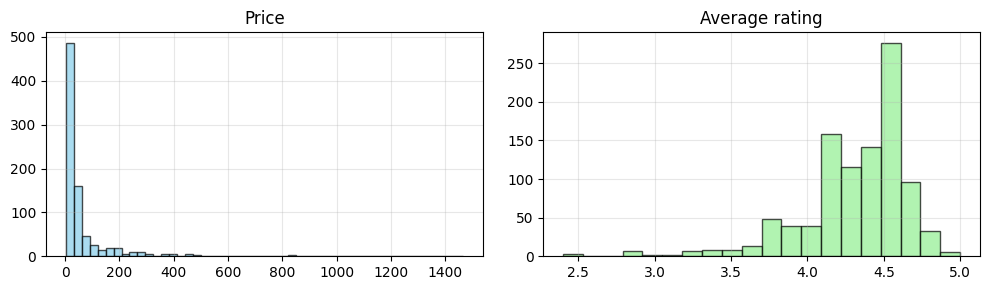

Price Statistics:
             price  average_rating
count   830.000000     1000.000000
mean     67.896277        4.313000
std     133.625418        0.357266
min       2.990000        2.400000
25%      13.990000        4.100000
50%      25.490000        4.400000
75%      55.990000        4.600000
max    1465.000000        5.000000


In [28]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))
# Price distribution
ax1.hist(df_meta['price'].dropna(), bins=50, alpha=0.7, color='skyblue', edgecolor='black')
ax1.set_title('Price')
ax1.grid(True, alpha=0.3)

# Average rating distribution
ax2.hist(df_meta['average_rating'].dropna(), bins=20, alpha=0.7, color='lightgreen', edgecolor='black')
ax2.set_title('Average rating')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Some statistics
print("Price Statistics:")
print(df_meta[['price', 'average_rating']].describe())

----------------------------------------------------------------------------------------------------
Category: All Electronics


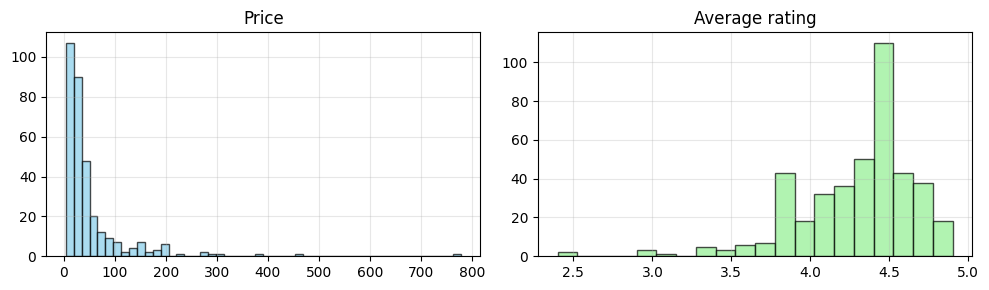

Price Statistics:
            price  average_rating
count  325.000000      415.000000
mean    49.743108        4.286024
std     71.073262        0.364682
min      4.440000        2.400000
25%     15.990000        4.100000
50%     27.990000        4.400000
75%     49.990000        4.500000
max    778.000000        4.900000
Most expensive product: 778.0: JBL Bar 9.1 Channel 3D Surround Sound Soundbar with Wireless Detachable Rear Speakers - 5.1.4-Channel, Bluetooth, AirPlay 2, and Chromecast, 820W, USB, HDMI
----------------------------------------------------------------------------------------------------
Category: Computers


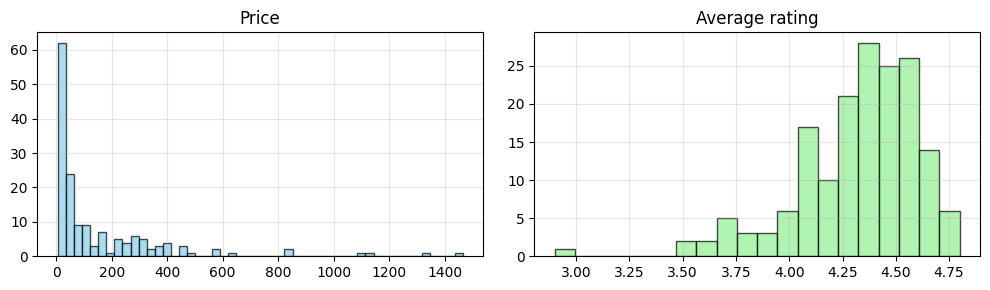

Price Statistics:
             price  average_rating
count   157.000000      169.000000
mean    157.868344        4.346746
std     241.041172        0.304341
min       4.990000        2.900000
25%      21.980000        4.200000
50%      49.990000        4.400000
75%     219.990000        4.600000
max    1465.000000        4.800000
Most expensive product: 1465.0: EVGA GeForce RTX 3080 FTW3 Ultra Gaming, 12G-P5-4877-KL, 12GB GDDR6X, iCX3 Technology, ARGB LED, Metal Backplate, LHR
----------------------------------------------------------------------------------------------------
Category: Cell Phones & Accessories


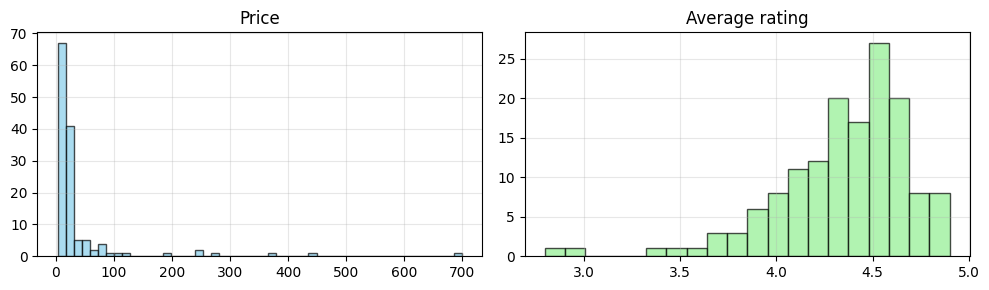

Price Statistics:
            price  average_rating
count  134.000000      148.000000
mean    39.921343        4.325676
std     85.046158        0.334038
min      2.990000        2.800000
25%     10.990000        4.200000
50%     16.485000        4.400000
75%     27.740000        4.500000
max    699.990000        4.900000
Most expensive product: 699.99: OnePlus 11 5G | 8GB RAM+128GB | Dual-SIM | Titan Black | US Factory Unlocked Android Smartphone | 5000 mAh battery | 80W Fast charging | Hasselblad Camera | 120Hz Fluid Display | 4nm Processor


In [29]:
top3_categories = df_meta['main_category'].value_counts().head(3).index

for category in top3_categories:
    print("-" * 100)
    print(f"Category: {category}")
    
    df_category = df_meta[df_meta['main_category'] == category]
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))
    
    # Price distribution
    ax1.hist(df_category['price'].dropna(), bins=50, alpha=0.7, color='skyblue', edgecolor='black')
    ax1.set_title('Price')
    ax1.grid(True, alpha=0.3)

    # Average rating distribution
    ax2.hist(df_category['average_rating'].dropna(), bins=20, alpha=0.7, color='lightgreen', edgecolor='black')
    ax2.set_title('Average rating')
    ax2.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Some statistics
    print("Price Statistics:")
    print(df_category[['price', 'average_rating']].describe())
    print(f"Most expensive product: {df_category['price'].max()}: {df_category[df_category['price'] == df_category['price'].max()].title.values[0]}")

### Ratings

In [30]:
print(df_ratings.shape)
print(df_ratings.columns)
display(df_ratings.head())

(105918, 10)
Index(['rating', 'title', 'text', 'images', 'asin', 'parent_asin', 'user_id',
       'timestamp', 'helpful_vote', 'verified_purchase'],
      dtype='object')


,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,5.0,Perfect!,This is perfect! Thank you so much!!! I absolu...,[],B09992M2LX,B09ZPV8WBV,AHX4XWVVQUKT3FCNWCVASDF4Q56Q,1659672399589,0,True
1,5.0,3ft mini usb cables,I don't have many things that still use a mini...,[],B09Y94B2NM,B09Y95BMKX,AFZUK3MTBIBEDQOPAK3OATUOUKLA,1657987408714,3,True
2,5.0,I would buy it again.,Great product. Worked well for what we needed ...,[],B07T55DL33,B0B2JWCMCY,AF5KFHNT3TQJ2GNSE3FCDFQOBICA,1575930900531,0,True
3,5.0,Great to Have Around,My husband and I were recently working a booth...,[],B09M89JN7B,B0BYYGZHG5,AHV6QCNBJNSGLATP56JAWJ3C4G2A,1647913429342,0,False
4,5.0,Easy to use,Work as advertised and at a very good price.,[],B07T55DL33,B0B2JWCMCY,AG7WKTZINOFIXMZJYIPKIB7PV7NQ,1577513544960,0,True


In [31]:
# Count NAs
print(df_ratings.isna().sum())

rating               0
title                0
text                 0
images               0
asin                 0
parent_asin          0
user_id              0
timestamp            0
helpful_vote         0
verified_purchase    0
dtype: int64


In [32]:
# Unique users
print(df_ratings['user_id'].nunique())

# Unique products
print(df_ratings['asin'].nunique())

# Unique products
print(df_ratings['parent_asin'].nunique())


102437
3076
1000


In [33]:
# Count records per parent_asin
print("Ratings per item (parent)")
print(df_ratings['parent_asin'].value_counts())

# Count items with less then 10 ratings
print(f"Items with less then 10 ratings: {df_ratings['parent_asin'].value_counts()[df_ratings['parent_asin'].value_counts() < 10].shape[0]}")	

Ratings per item (parent)
parent_asin
B0C7Q3X76Q    5538
B0C2WWCBSG    4609
B0BBY5TGTM    3032
B0B2JWCMCY    2290
B0BC13TQJQ    2215
              ... 
B0CGHXJR1Z       1
B0CHN3BSQM       1
B0C48WYVBQ       1
B0BVQMXDW2       1
B0CB5N7PND       1
Name: count, Length: 1000, dtype: int64
Items with less then 10 ratings: 183


In [34]:
# Counts of each parent_asin
asin_counts = df_ratings['parent_asin'].value_counts()

# Intervals 
bins = [0, 9, 49, 99, 499, 999, 1999, 2999, 3999, 4999, float('inf')]
labels = ['1-9', '10-49', '50-99', '100-499', '500-999', '1000-1999', '2000-2999', '3000-3999', '4000-4999', '5000+']
interval_counts = pd.cut(asin_counts, bins=bins, labels=labels, include_lowest=True).value_counts().sort_index()

# To df
intervals_df = pd.DataFrame({
    'interval_of_number_of_ratings': interval_counts.index,
    'number_of_items': interval_counts.values,
    'percentage_of_items': (interval_counts.values / interval_counts.sum() * 100).round(2)
})

display(intervals_df)

,interval_of_number_of_ratings,number_of_items,percentage_of_items
0,1-9,183,18.3
1,10-49,468,46.8
2,50-99,163,16.3
3,100-499,148,14.8
4,500-999,20,2.0
5,1000-1999,11,1.1
6,2000-2999,4,0.4
7,3000-3999,1,0.1
8,4000-4999,1,0.1
9,5000+,1,0.1


In [35]:
# Filter items with most ratings
df_ratings_filtered = df_ratings[df_ratings['parent_asin'].isin(df_ratings['parent_asin'].value_counts()[df_ratings['parent_asin'].value_counts() > 3000].index)]

print('Items with most ratings (3000+)')
# Count unique users
print(f"- Number of records: {df_ratings_filtered.shape[0]}")
print(f"- Number of users: {df_ratings_filtered['user_id'].nunique()}")
print(f"- Number of items (parent): {df_ratings_filtered['parent_asin'].nunique()}")
print(f"- Number of ratings: {df_ratings_filtered['asin'].nunique()}")

print("Ratings per item (parent) in most rated items (3000+)")
# Ratings per item
print(df_ratings_filtered['parent_asin'].value_counts())

Items with most ratings (3000+)
- Number of records: 13179
- Number of users: 13035
- Number of items (parent): 3
- Number of ratings: 14
Ratings per item (parent) in most rated items (3000+)
parent_asin
B0C7Q3X76Q    5538
B0C2WWCBSG    4609
B0BBY5TGTM    3032
Name: count, dtype: int64


In [36]:
# Most rated item
display(df_meta[df_meta['parent_asin']=='B0C7Q3X76Q'])
print(df_ratings[df_ratings['parent_asin']=='B0C7Q3X76Q'].shape)
display(df_ratings[df_ratings['parent_asin']=='B0C7Q3X76Q'])

,main_category,title,average_rating,rating_number,features,description,price,images,videos,store,categories,details,parent_asin,bought_together,subtitle,author
275,Cell Phones & Accessories,Aioneus USB A to Type C Charger Cable 10ft 3Pa...,4.5,41057,[【What You Get】: Aioneus 3Pack 10ft USB C Cabl...,[],10.99,[{'thumb': 'https://m.media-amazon.com/images/...,"[{'title': 'PHOOZY TechCapsule and Gear!', 'ur...",Aioneus,"[Electronics, Computers & Accessories, Compute...","{'Brand': 'Aioneus', 'Connector Type': 'USB Ty...",B0C7Q3X76Q,None,None,None


(5538, 10)


,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
19,5.0,Look good,So far they are ok,[],B07WGSJ51B,B0C7Q3X76Q,AG7GVIVA5QL62KVURGM4YUBWE6QQ,1589165750641,0,False
26,5.0,Love the length and colors,"Just started using these, so can't say on dura...",[],B07WGSJ51B,B0C7Q3X76Q,AHHJ44DREA54LXBNGA27EXIWQ3DQ,1573566361314,87,True
33,5.0,Exactly what I wanted!,The 3ft. charging cords are a joke so I wanted...,[],B07WGSJ51B,B0C7Q3X76Q,AEZUH6OWMCICUJ2MWPBLFSZTSTUA,1591741696489,0,True
132,1.0,Disappointing,Does not fit any of my devices,[],B07WGSJ51B,B0C7Q3X76Q,AHO5LLQVEX4GXSL7C6RTDQGUIFLQ,1615057225994,0,True
135,5.0,Quality and price,Why would you want the struggle of a short cor...,[],B07WGSJ51B,B0C7Q3X76Q,AGUVBOCOJYPCE3KQAHXWD7UUX2AA,1586989720174,1,True
...,...,...,...,...,...,...,...,...,...,...
105811,1.0,DO NOT WASTE YOUR MONEY!!!,Purchased 3 pack in September- All 3 cords tor...,[],B07WGSJ51B,B0C7Q3X76Q,AFYESEM5VLWEGTMCVETGUWUWYCXA,1605678208300,0,True
105820,5.0,U B chargers,They work great.,[],B07WGSJ51B,B0C7Q3X76Q,AH6RHL4ULVRANHJD2TNGPZILZPGQ,1590144983554,0,True
105889,5.0,quality,"High quality, durable, nice length, good color...",[],B07WGSJ51B,B0C7Q3X76Q,AE3M2JMLCBWQMC7MTD2UJ4GSPZ2Q,1630286073407,0,True
105908,4.0,They work,So far the charger is working great however I ...,[],B07WGSJ51B,B0C7Q3X76Q,AHBNQ5PRATUHCZ6WZAUINAZOWIWA,1587474114782,0,True
